## KMeans Image Segmentation

#This code reads an image and treats pixel as three element feature vector of unsupervised data.
#It performs KMeans clustering of the pixels and then re-colours the image using the median of each colour component within the clusters.

In [5]:
# The usual loading of modules
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
from sklearn import cluster
from scipy import misc
from numpy import zeros

import time
start = time.time()

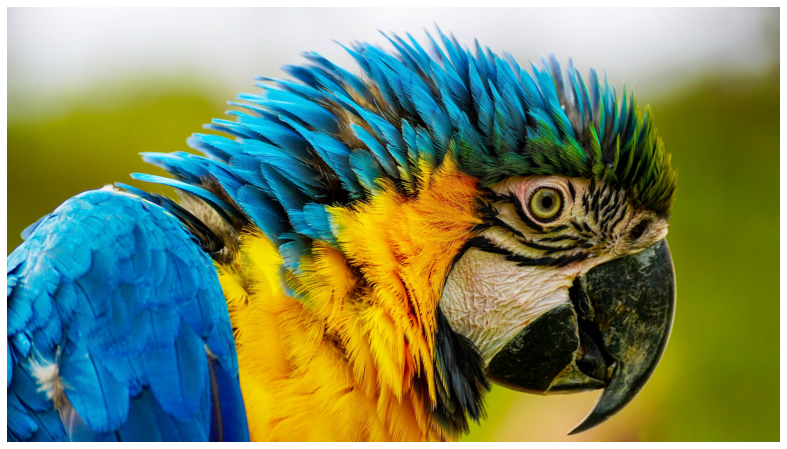

In [6]:
# Load an image.
#imagex = image.imread("parrot_small.jpeg") # You may want to test with a smaller image, it will be faster
#imagex = image.imread("C:/Users/latma/OneDrive/Documents/ComputerScience_Yr2/Machine_Learning/LabSheet2/parrot_small.jpg")
imagex = image.imread("C:/Users/latma/OneDrive/Documents/ComputerScience_Yr2/Machine_Learning/LabSheet2/parrot.jpeg")
plt.figure(figsize = (15,8))
plt.axis("off") # An axis free plot
plt.imshow(imagex) # Display the image
x, y, z = imagex.shape # Get the dimensions of the image (z is the number of colour bytes)
image_2d = imagex.reshape(x*y, z) # Turn the 2D pixels into 1D pixels, one longg single dimseniosn array
image_2dr = zeros([x*y,z]) # and create an output array for the re-coloured image. 

In [15]:
"""# THIS IS THE PART YOU ARE TO REPLACE
cluster_count = 5 # How many clusters we want
kmeans_cluster = cluster.KMeans(n_clusters=cluster_count) # Create a clusterer
kmeans_cluster.fit(image_2d) # Apply it to the data
cluster_centers = kmeans_cluster.cluster_centers_ # we're not using these
cluster_labels = kmeans_cluster.labels_ # Cluster membership for EACH pixel --> gives a value 0-4 for every pixel in the 1D array
#print("cluster_labels: ", cluster_labels) # wont always be the same values"""

'# THIS IS THE PART YOU ARE TO REPLACE\ncluster_count = 5 # How many clusters we want\nkmeans_cluster = cluster.KMeans(n_clusters=cluster_count) # Create a clusterer\nkmeans_cluster.fit(image_2d) # Apply it to the data\ncluster_centers = kmeans_cluster.cluster_centers_ # we\'re not using these\ncluster_labels = kmeans_cluster.labels_ # Cluster membership for EACH pixel --> gives a value 0-4 for every pixel in the 1D array\n#print("cluster_labels: ", cluster_labels) # wont always be the same values'

In [7]:
import numpy as np
import random
import math
import copy

cluster_count = 5 # How many clusters we want
#setting up the centroids
colourChannels = z
colourDepth = 256
centroids = np.empty([cluster_count, colourChannels+1])
centroids.fill(0)

no_pixels = x*y
emptyImage = np.empty([no_pixels, colourChannels+1])
imagePixels = copy.deepcopy(image_2d)
pixelsCluster = np.empty([no_pixels]) # have a seperate list to story the cluster values for every pixel


In [8]:
def Calc_InitailCentroids(cent):
    for i in range(0, cluster_count):
        R = random.randint(0,colourDepth)
        G = random.randint(0,colourDepth)
        B = random.randint(0,colourDepth)
        cent[i] = [R, G, B, i]
    return cent

def calcDistance(point_A, point_B):
    dist = math.sqrt((point_A[0]-point_B[0])**2 + (point_A[1]-point_B[1])**2 + (point_A[2]-point_B[2])**2)
    return dist

def AssignCluster(pixelsCluster):
    #print("In AssignCluster")
    distances = [0]*cluster_count
    for i in range(0,no_pixels):
    #for i in range(0,10000):
        for j in range(0, cluster_count):
            distances[j] = calcDistance(centroids[j], imagePixels[i])

        pixClus = distances.index(min(distances))
        pixelsCluster[i] = pixClus

    return pixelsCluster

def getCluster(list,clusterID, total):
    pos_ClusterElements =[]
    for i in range(total):
        if list[i] == clusterID:
            pos_ClusterElements.append(i)
    return pos_ClusterElements

def calc_ClusterAverage(pos, img):
    sum = [0]*colourChannels
    for x in pos:
        for i in range(colourChannels):
            sum[i] += img[x][i]
    for i in range(colourChannels):
        try:
            sum[i] = sum[i]/len(pos)
        except(ZeroDivisionError):
            sum[i] = 0
    return sum

def Calc_newCentroid(OLDcent):
    cent = copy.deepcopy(OLDcent)
    for i in range(0,cluster_count):
        cluster_positions = getCluster(pixelsCluster, i, no_pixels)
        cluster_median = calc_ClusterAverage(cluster_positions, imagePixels)
        for j in range(colourChannels):
            cent[i][j] = cluster_median[j]
    return cent

def differnecIsGreateEnough(oldC, newC):
    diff = [0]*colourChannels
    allDiffs = []
    for i in range(cluster_count):
        for j in range(colourChannels):
            d = abs(oldC[i][j] - newC[i][j])
            diff[j] = d

        if max(diff) < 1:
            allDiffs.append(True)
        else:
            allDiffs.append(False)
    if all(allDiffs) == True:
        return True
    return False

centroids = Calc_InitailCentroids(centroids)
#print("working")
pixelsCluster = AssignCluster(pixelsCluster)
newCentroids = Calc_newCentroid(centroids)
#print(" Calc_newCentroid(): \n",  newCentroids)
c=1
while differnecIsGreateEnough(centroids, newCentroids) == False:
    c += 1
    centroids = copy.deepcopy(newCentroids)
    pixelsCluster = AssignCluster(pixelsCluster)
    newCentroids = Calc_newCentroid(centroids)

#print(c," centroids: \n", centroids)

cluster_labels = copy.deepcopy(pixelsCluster)

In [9]:
# Turn the clustered data into a DataFrame and add the class as a fourth column
cluster_2d = pd.DataFrame(image_2d, columns=list('abc')) # creates collumns labeled a,b,c,d,e
cluster_2d['d'] = cluster_labels # acesses column d, and assigns it a number 0 to 4 depending which call every pixel should be

# loop over each of the clusters and calculate a colour to represent it.
for a in range(0,cluster_count):
    subset = cluster_2d.loc[cluster_2d['d'] == a] # Extract all the pixels that belong to the cluster
    m = subset.median().values # and calcuate the median of each colour channel
    print("m: ", m) # Show each of the colours we're going to use

    # Each pixel in the cluster is then painted with the cluster colour
    for i in range(0, len(cluster_labels)):
        if (cluster_labels[i] == a): #if the current pixel is part of the class a currently testing for,
            image_2dr[i] = m[0:3]

m:  [  1.  91. 148.   0.]
m:  [  6. 160. 205.   1.]
m:  [81. 76.  3.  2.]
m:  [220. 223. 228.   3.]
m:  [189. 156.   4.   4.]


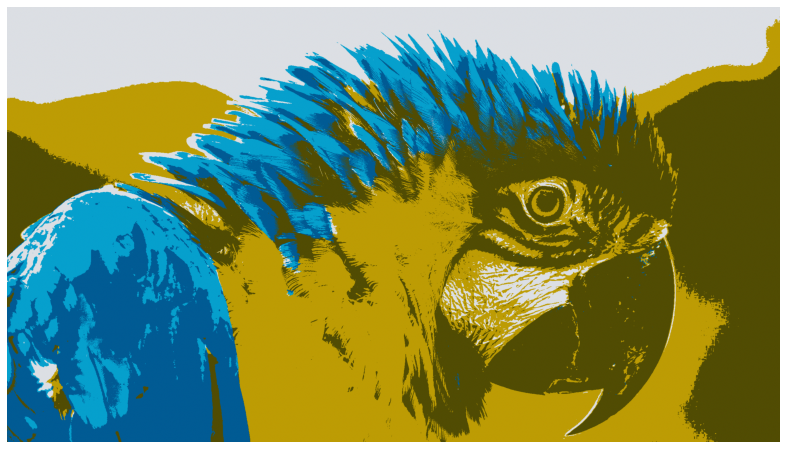

In [10]:
# Display the results
image_out = image_2dr.reshape(x, y, z)/255.0 #Scale to 0-1 range
plt.figure(figsize = (15,8))
plt.axis("off")
plt.imshow(image_out)

# Use the following to save the image
plt.savefig('clustered_out.png', bbox_inches='tight')
#end = time.time()
#timePassed=end-start;
#print(timePassed)